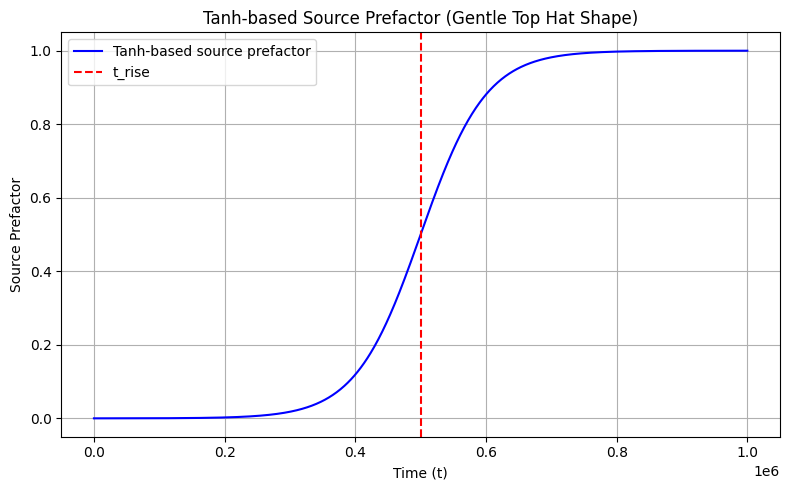

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
t_rise = 0.5e6  # When the transition starts
t_width = 0.1e6  # How smooth the rise/fall is
t_max = 1e6  # Maximum time for the plot

# Define the tanh-based source prefactor
def source_prefactor(t, t_rise, t_width):
    return 0.5 * (1 + np.tanh((t - t_rise) / t_width))

# Create a time array
t = np.linspace(0, t_max, 1000)

# Calculate the source prefactor for each time point
source = source_prefactor(t, t_rise, t_width)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(t, source, label='Tanh-based source prefactor', color='blue')
plt.axvline(x=t_rise, color='red', linestyle='--', label='t_rise')
plt.title('Tanh-based Source Prefactor (Gentle Top Hat Shape)')
plt.xlabel('Time (t)')
plt.ylabel('Source Prefactor')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


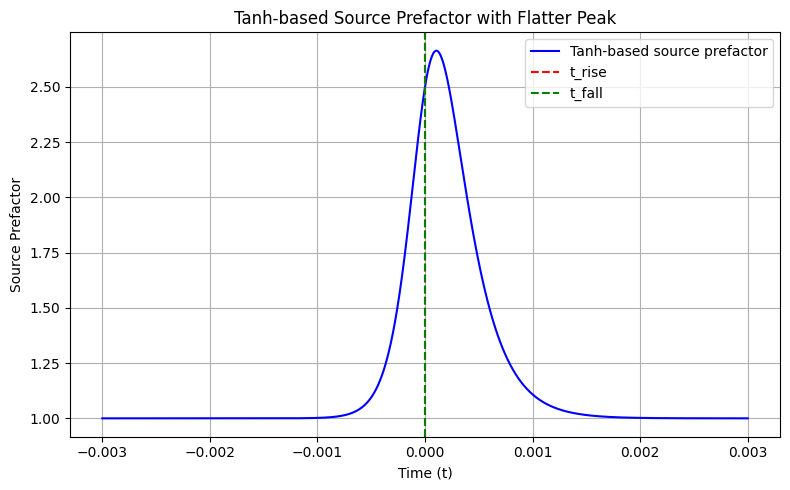

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t_rise = 0.5e-6
t_width_rise = 250e-6
t_width_fall = 500e-6
t_hold = 0.3e-6
t_max = 3e-3
base_power = 1
peak_power = 6
power_multiplier = 5

def source_prefactor(t, t_rise, t_width_rise, t_width_fall, t_hold, base_power, power_multiplier):
    rise = 0.5 * (1 + np.tanh((t - t_rise) / t_width_rise))
    fall = 0.5 * (1 + np.tanh((t_rise + t_hold - t) / t_width_fall))
    return base_power + (base_power*power_multiplier) * rise * fall

t = np.linspace(-t_max, t_max, 1000)
source = source_prefactor(t, t_rise, t_width_rise, t_width_fall, t_hold, base_power, peak_power)

plt.figure(figsize=(8, 5))
plt.plot(t, source, label='Tanh-based source prefactor', color='blue')
plt.axvline(x=t_rise, color='red', linestyle='--', label='t_rise')
plt.axvline(x=t_rise + t_hold, color='green', linestyle='--', label='t_fall')
plt.title('Tanh-based Source Prefactor with Flatter Peak')
plt.xlabel('Time (t)')
plt.ylabel('Source Prefactor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def temporal_source(t_rise):
    fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)
    t = np.linspace(0, 0.02, 1000)

    source_multiplier = (1+(t_rise/t)**2)*(t_rise/t)**2*np.exp(-(t_rise/t)**2)
    plt.grid()
    plt.plot(t, source_multiplier, label='Temporal source')
    plt.xlabel(r'$t - t_{ELM}$ (ms)')
    plt.ylabel(r'$q_{ELM(t)} / q_{ELM,0}$')
    plt.show()

/tmp/ipykernel_3310237/3685122706.py:8: RuntimeWarning: divide by zero encountered in divide
  source_multiplier = (1+(t_rise/t)**2)*(t_rise/t)**2*np.exp(-(t_rise/t)**2)
/tmp/ipykernel_3310237/3685122706.py:8: RuntimeWarning: invalid value encountered in multiply
  source_multiplier = (1+(t_rise/t)**2)*(t_rise/t)**2*np.exp(-(t_rise/t)**2)


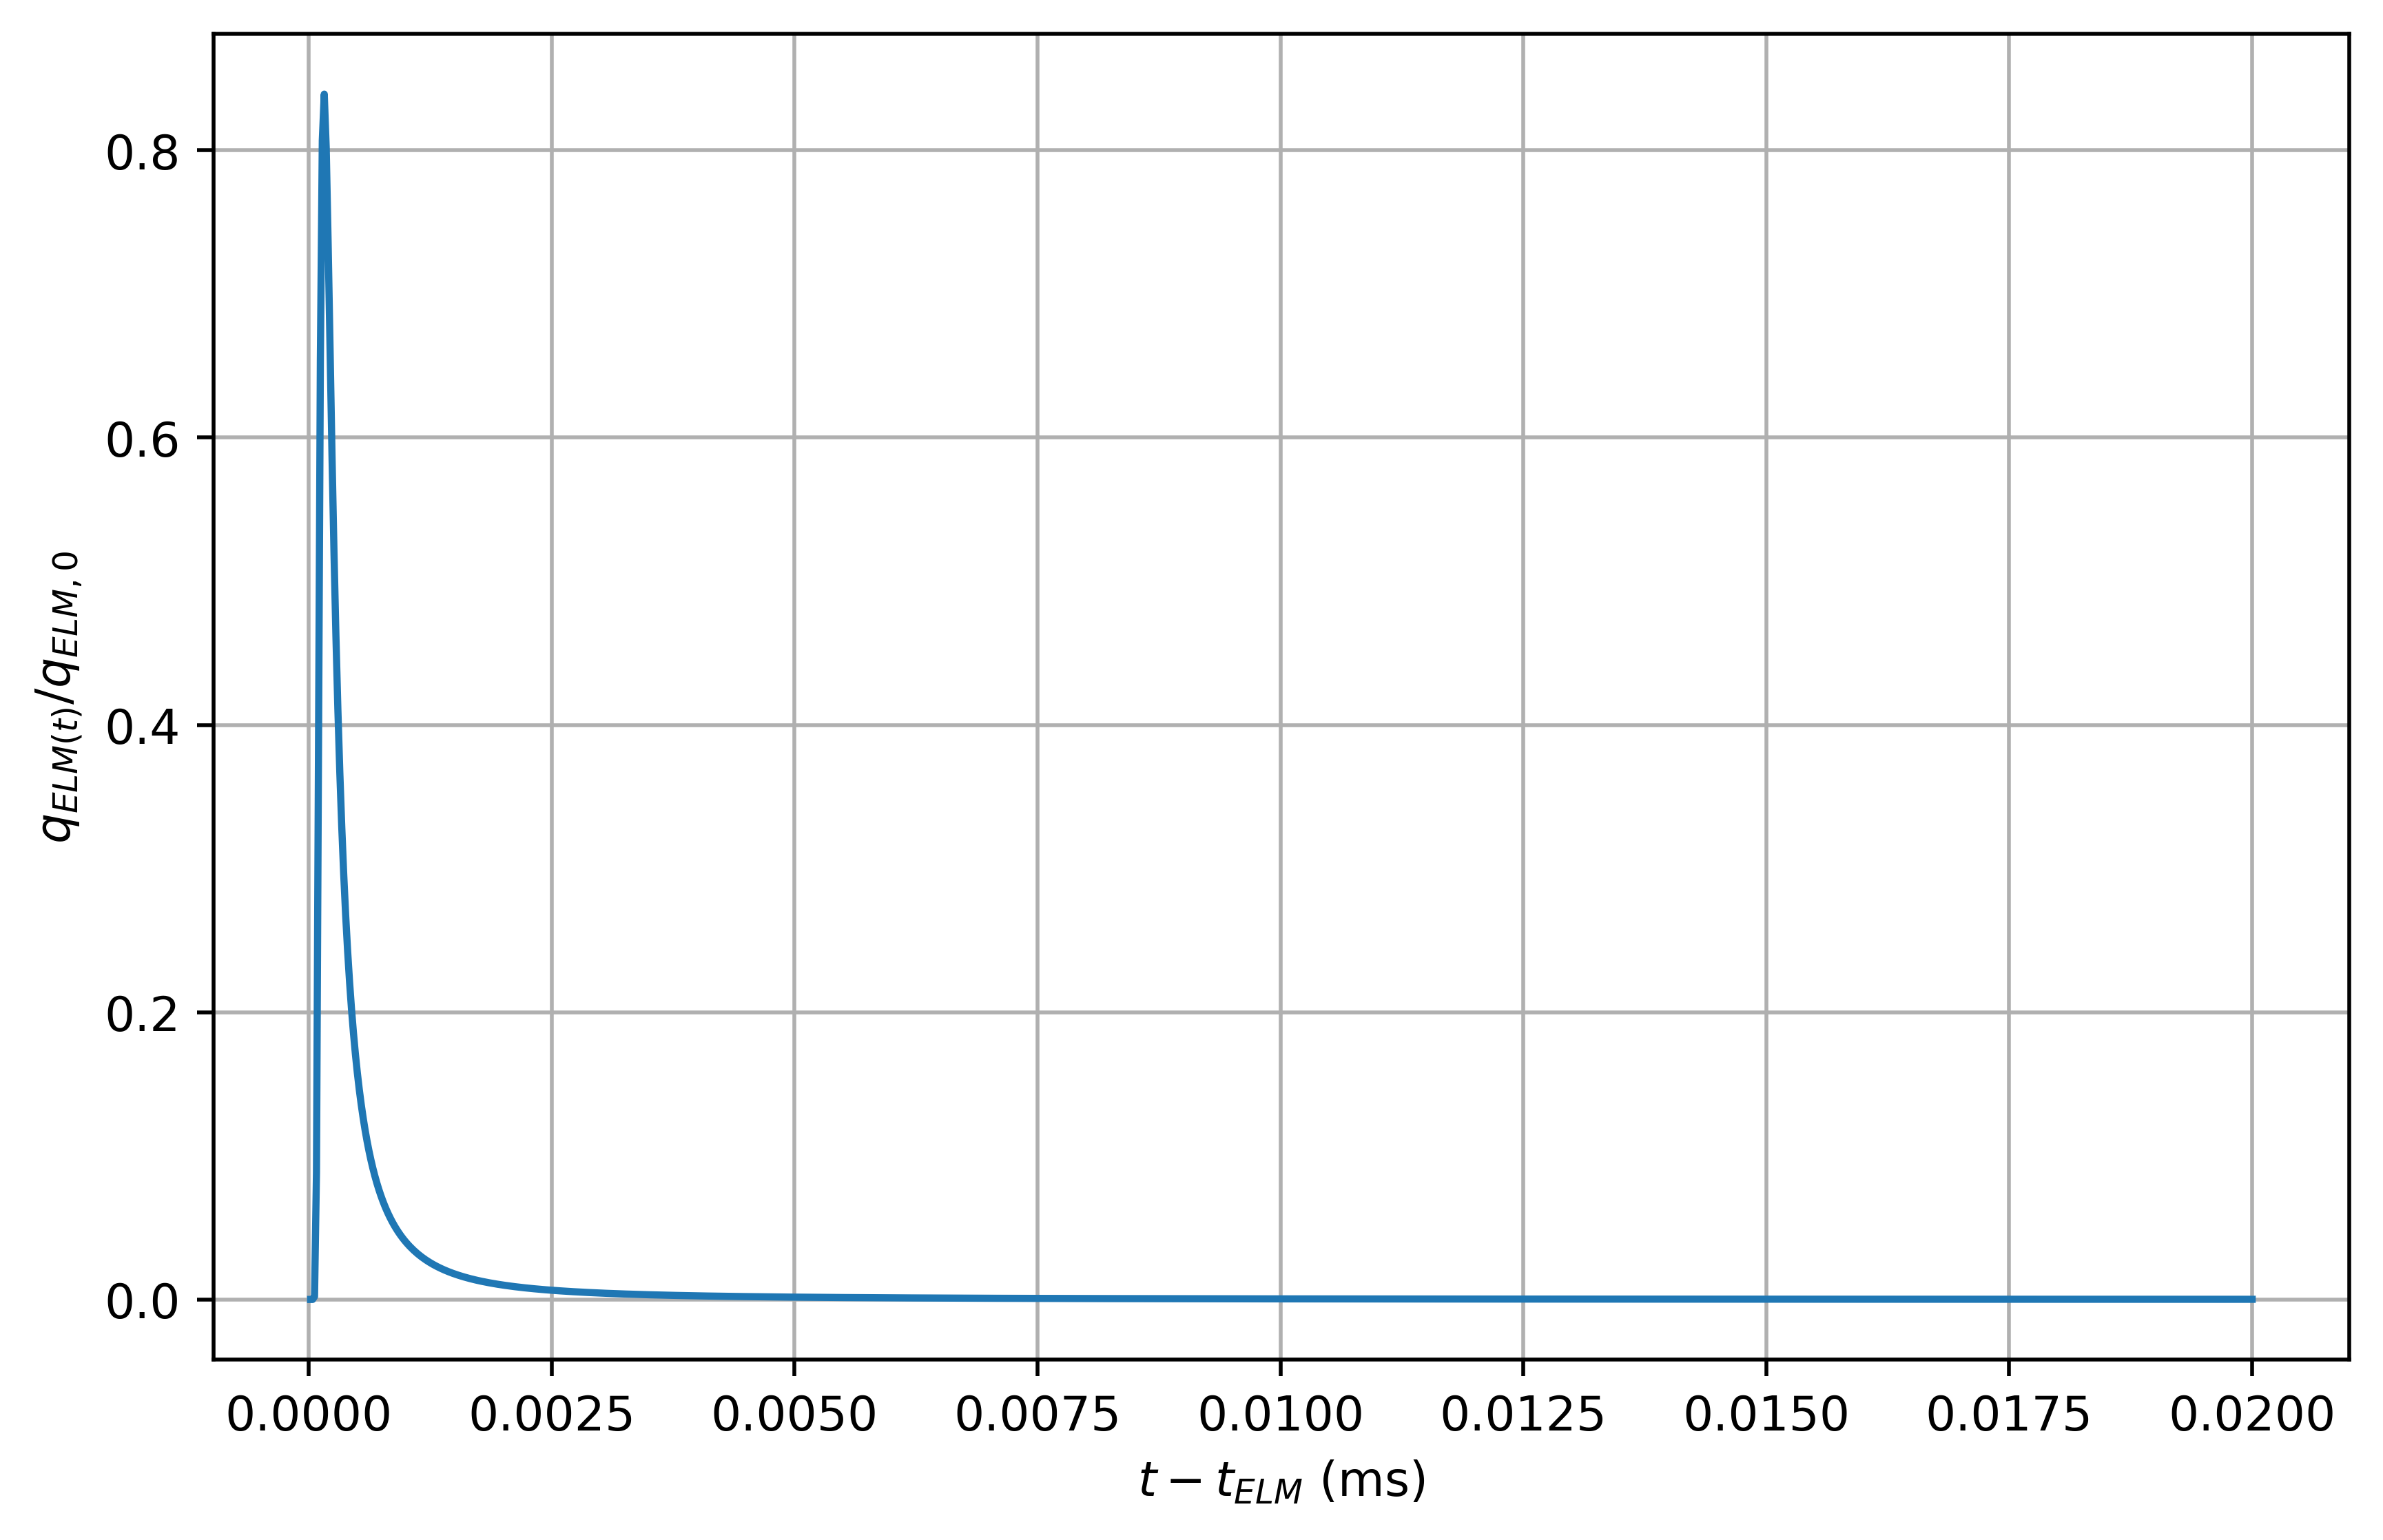

In [5]:


t_rise = 0.8*250e-6
temporal_source(t_rise)

In [6]:
import numpy as np

def elm_heat_flux(t, t_rise, base_heat_flux, power_increase):
    """
    Simulate transient increase in power into the SOL due to an ELM,
    ensuring that the peak corresponds to the user-specified power increase.
    
    Parameters:
    t (float or np.array): Time or array of time points.
    t_rise (float): Characteristic rise time of the ELM.
    base_heat_flux (float): Baseline heat flux into the SOL.
    power_increase (float): User-defined multiplier for the peak increase in power.
    
    Returns:
    np.array: Heat flux into the SOL at each time point.
    """
    # Calculate the source multiplier
    source_multiplier = (1 + (t_rise / t)**2) * (t_rise / t)**2 * np.exp(-(t_rise / t)**2)
    
    # Normalise the source multiplier so that its peak is 1
    max_source_multiplier = np.max(source_multiplier)
    normalised_multiplier = source_multiplier / max_source_multiplier
    
    # Scale by the user-defined power increase
    scaled_multiplier = 1 + (power_increase - 1) * normalised_multiplier
    
    # Calculate the heat flux
    heat_flux = base_heat_flux * scaled_multiplier
    
    return heat_flux


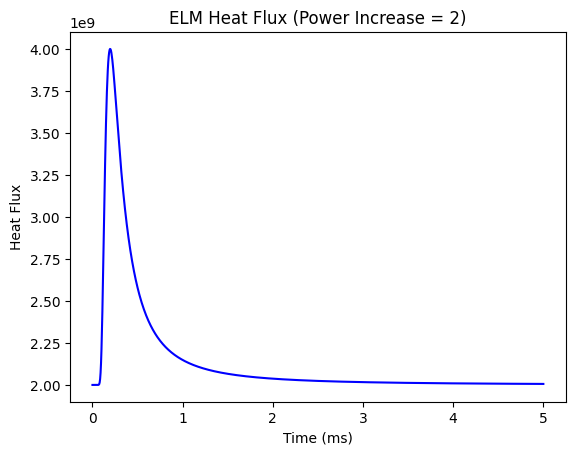

In [7]:
import matplotlib.pyplot as plt

t = np.linspace(1e-9, 5e-3, 1000)  # Time points
t_rise = 250e-6  # Rise time of the ELM
base_heat_flux = 2.0e9  # Baseline heat flux
power_increase = 2  # Power increase factor

heat_flux = elm_heat_flux(t, t_rise, base_heat_flux, power_increase)

# Plotting the result
plt.plot(t*1e3, heat_flux, 'b')
plt.xlabel('Time (ms)')
plt.ylabel('Heat Flux')
plt.title(f'ELM Heat Flux (Power Increase = {power_increase})')
plt.show()


0.002
Maximum base multiplier: 0.8399361233006304


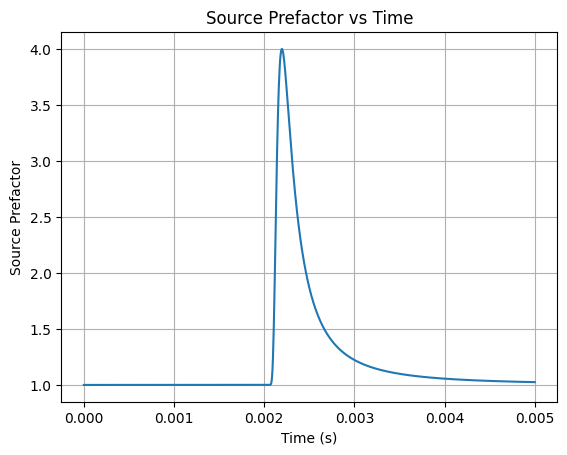

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time points for the plot
t = np.linspace(0, 5e-3, 1000)  # Time points

omega_ci = 95788333.0    # normalise to simulation timestep
epsilon_min = 1e-9       # small number to avoid divide by zero in t_current
sim_start_timestep = 1e-3
rise_start = 1e-3        # offset from the sim start time step
t_rise = (sim_start_timestep) + rise_start

print(t_rise)
t_current = np.maximum(t - t_rise, epsilon_min)  # time since ELM pulse started


t_ramp = 250e-6  # Rise time of the ELM
base_heat_flux = 1.0  # Baseline heat flux
power_increase = 4.0  # Power increase factor

# Typical divertor ELM time loading
base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                  (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)

max_base_multiplier = np.max(base_multiplier)
print(f"Maximum base multiplier: {max_base_multiplier}")
max_base_multiplier = 0.84
normalised_multiplier = base_multiplier / max_base_multiplier

source_prefactor = 1 + (power_increase - 1) * normalised_multiplier

# Plotting the source_prefactor as a function of time
plt.plot(t, source_prefactor)
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.title("Source Prefactor vs Time")
plt.grid(True)
plt.show()


Maximum base multiplier: 0.839909218750507


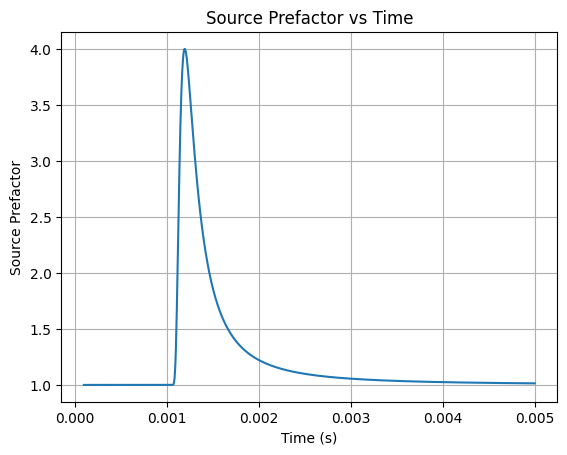

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Time points for the plot
t = np.linspace(1e-4, 5e-3, 1000)  # Extended Time points

omega_ci = 95788333.0    # normalise to simulation timestep
epsilon_min = 1e-9       # small number to avoid divide by zero in t_current
sim_start_timestep = 1e-3
rise_start = 1e-3        # offset from the sim start time step
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_current = np.maximum(t - t_rise, epsilon_min)  # time since ELM pulse started

t_ramp = 250e-6  # Rise time of the ELM
base_heat_flux = 1.0  # Baseline heat flux
power_increase = 4.0  # Power increase factor

# Function to calculate base_multiplier for a given t
def base_multiplier_func(t, t_rise, t_ramp, base_heat_flux):
    t_current = np.maximum(t - t_rise, epsilon_min)
    base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                      (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)
    return base_multiplier

# Use optimization to find the maximum of base_multiplier
result = opt.minimize_scalar(lambda t: -base_multiplier_func(t, t_rise, t_ramp, base_heat_flux), 
                             bounds=(1e-4, 5e-3), method='bounded')

max_base_multiplier = -result.fun  # Get the maximum value
print(f"Maximum base multiplier: {max_base_multiplier}")

# Calculate base_multiplier over the time range
base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                  (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)


# Normalize with the calculated maximum
normalised_multiplier = base_multiplier / max_base_multiplier

source_prefactor = 1 + (power_increase - 1) * normalised_multiplier

# Plotting the source_prefactor as a function of time
plt.plot(t, source_prefactor)
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.title("Source Prefactor vs Time")
plt.grid(True)
plt.show()


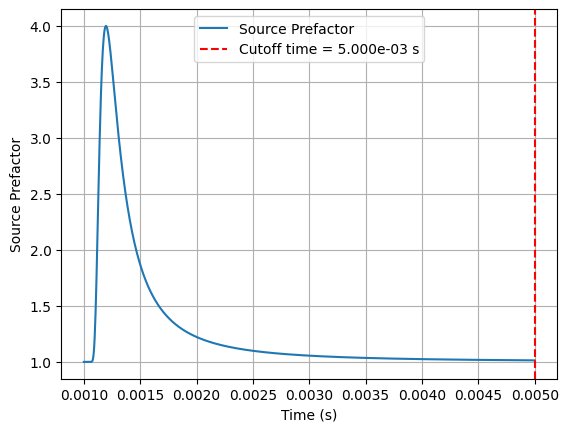

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Time points for the plot
t = np.linspace(1e-3, 5e-3, 1000)  # Time points

omega_ci = 95788333.0    # normalise to simulation timestep
epsilon_min = 1e-9       # small number to avoid divide by zero in t_current
sim_start_timestep = 1e-3
rise_start = 1e-3        # offset from the sim start time step
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_current = np.maximum(t - t_rise, epsilon_min)  # time since ELM pulse started

t_ramp = 250e-6  # Rise time of the ELM
base_heat_flux = 1.0  # Baseline heat flux
power_increase = 4.0  # Power increase factor

# Typical divertor ELM time loading
base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                  (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)

# Normalising the multiplier
max_base_multiplier = np.max(base_multiplier)
normalised_multiplier = base_multiplier / max_base_multiplier

# Calculate the source prefactor
source_prefactor = 1 + (power_increase - 1) * normalised_multiplier
threshold_value = 0.01 * np.max(source_prefactor)  # 1% of the peak

# Check if the source prefactor drops below the threshold
if np.min(source_prefactor) <= threshold_value:
    # Find the time where the function drops to 1% of the peak
    cutoff_index = np.where(source_prefactor <= threshold_value)[0][0]
    t_cutoff = t[cutoff_index]
else:
    # If the threshold isn't reached, use the last time value as cutoff
    t_cutoff = t[-1]

# Set the source prefactor to 1 after the cutoff point
source_prefactor = np.where(t <= t_cutoff, source_prefactor, 1)

# Plotting the source_prefactor as a function of time
plt.plot(t, source_prefactor, label="Source Prefactor")
plt.axvline(x=t_cutoff, color='r', linestyle='--', label=f'Cutoff time = {t_cutoff:.3e} s')
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.grid(True)
plt.legend()
plt.show()


# Ignore ----------

In [11]:
import numpy as np

def elm_pulse_shape(t, t_rise):
    """
    Calculate the shape of the ELM pulse.
    
    Parameters:
    t (float or np.array): Time or array of time points.
    t_rise (float): Characteristic rise time of the ELM.
    
    Returns:
    np.array: The source multiplier at each time point.
    """
    # Avoid division by zero for t=0 by setting a lower bound
    t = np.where(t <= 0, 1e-10, t)
    
    # Calculate the source multiplier based on the ELM pulse shape
    source_multiplier = (1 + (t_rise / t)**2) * (t_rise / t)**2 * np.exp(-(t_rise / t)**2)
    
    # Normalize the pulse to have a maximum of 1
    max_source_multiplier = np.max(source_multiplier)
    
    return source_multiplier / max_source_multiplier

def elm_pulse_series(t, t_rise, base_heat_flux, power_increase, frequency):
    """
    Generate periodic ELM pulses with the given frequency and pulse shape.
    
    Parameters:
    t (float or np.array): Time or array of time points.
    t_rise (float): Characteristic rise time of the ELM.
    base_heat_flux (float): Baseline heat flux into the SOL.
    power_increase (float): User-defined multiplier for the peak increase in power.
    frequency (float): Frequency of the pulses (in Hz or 1/time units).
    
    Returns:
    np.array: Heat flux into the SOL at each time point.
    """
    # Period of the pulse based on frequency
    period = 1.0 / frequency
    
    # Initialize the heat flux array
    heat_flux = np.full_like(t, base_heat_flux)  # Set initial heat flux to base level
    
    # Loop over the pulses, shifting the time for each pulse
    for n in range(int(t[-1] // period) + 1):  # Number of pulses in the time interval
        # Shift time for this pulse
        t_shifted = t - n * period
        # Apply pulse shape only when within this pulse's time range (positive shifted time)
        pulse_mask = t_shifted > 0
        if np.any(pulse_mask):  # Ensure there are valid time points for the pulse
            pulse_shape = elm_pulse_shape(t_shifted[pulse_mask], t_rise)
            # Calculate the pulse heat flux and reset to base after each pulse
            heat_flux[pulse_mask] = base_heat_flux * (1 + (power_increase - 1) * pulse_shape)
    
    return heat_flux


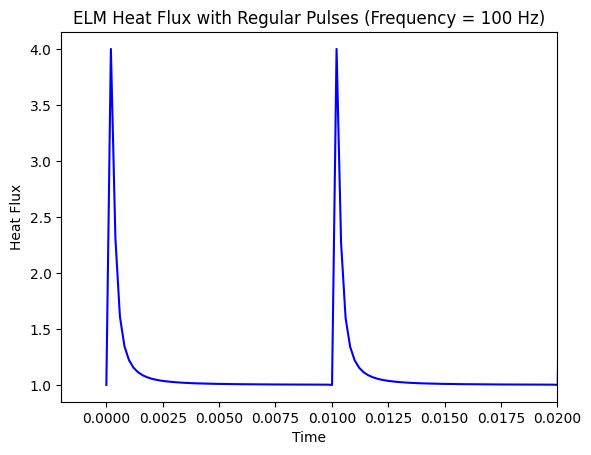

In [12]:
t = np.linspace(0.01e-9, 200e-3, 1000)  # Time points
t_rise = 250e-6  # Rise time of the ELM
base_heat_flux = 1.0  # Baseline heat flux
power_increase = 4  # Power increase factor
frequency = 100  # Frequency of 0.5 Hz (1 pulse every 2 seconds)

heat_flux = elm_pulse_series(t, t_rise, base_heat_flux, power_increase, frequency)

# Plotting the result
import matplotlib.pyplot as plt
plt.plot(t, heat_flux, 'b')
plt.xlabel('Time')
plt.ylabel('Heat Flux')
plt.title(f'ELM Heat Flux with Regular Pulses (Frequency = {frequency} Hz)')
plt.xlim(-0.002, 0.02)
plt.show()


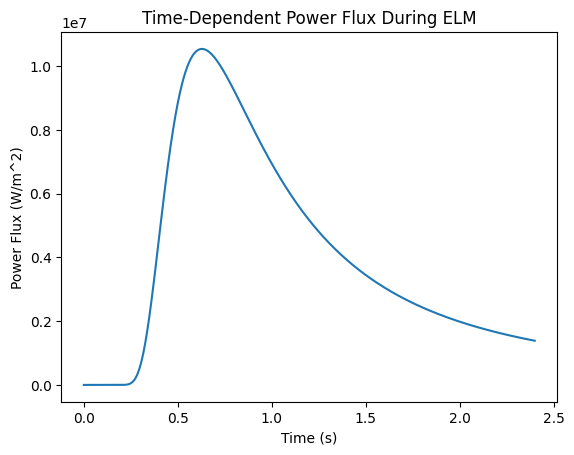

In [13]:
import numpy as np
from scipy.integrate import quad

# Given parameters
epsilon_perp_ELM = 10e6  # Energy fluence from Eich scaling (J/m^2)
tau = 0.8  # Time constant of the rise phase (seconds)
t_ELM = 3 * tau  # Total ELM duration

# Temporal profile function (from Eq. 9)
def temporal_profile(t, tau):
    return (1 + (tau/t)**2) * (tau/t)**2 * np.exp(-(tau/t)**2)

# Numerical integration of the profile over the ELM duration
integral_value, _ = quad(temporal_profile, 0, t_ELM, args=(tau,))

# Calculate the spatial peak power flux q0_ELM (from Eq. 10)
q0_ELM = epsilon_perp_ELM / integral_value

# Time array for calculating the time-dependent power flux
t = np.linspace(0.01e-6, t_ELM, 1000)  # Avoid division by zero at t=0

# Time-dependent power flux (from Eq. 9)
q_perp_ELM = q0_ELM * temporal_profile(t, tau)

# Plot the time-dependent power flux
import matplotlib.pyplot as plt
plt.plot(t, q_perp_ELM)
plt.xlabel('Time (s)')
plt.ylabel('Power Flux (W/m^2)')
plt.title('Time-Dependent Power Flux During ELM')
plt.show()


In [14]:
coef0 = 1.7597676684e+00		# Manually setting the flux expansion with a profile from the equilibrium files
coef1 = 4.1883560155e-01		# Very hacky but it gets the job done
coef2 = -4.6906367245e+00		# area_expansion normally does a good enough job
coef3 = 7.3174700447e+00
coef4 = -5.7251396733e+00
coef5 = 2.6799740048e+00
coef6 = -7.9457620000e-01
coef7 = 1.5075033673e-01
coef8 = -1.7757965412e-02
coef9 = 1.1834284917e-03
coef10 = -3.4102000406e-05

y = np.linspace(0,2*np.pi,100)


J = 0  + y**0*coef0 + y**1*coef1 + y**2*coef2 + y**3*coef3 + y**4*coef4 + y**5*coef5 + y**6*coef6 + y**7*coef7 + y**8*coef8 + y**9*coef9 + y**10*coef10

Text(0, 0.5, 'flux expansion')

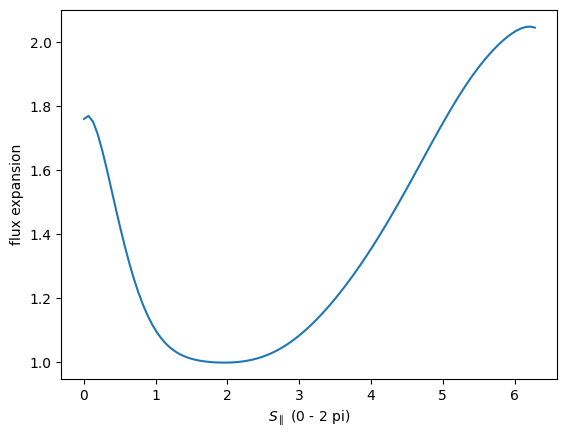

In [15]:
plt.plot(y,J)
plt.xlabel(r'$S_{\parallel}$ (0 - 2 pi)')
plt.ylabel(r'flux expansion')

In [16]:
import numpy as np
import scipy.integrate as integrate

# Dummy values for the right-hand side (these should be realistic in practice)
C = 1.0
p_e = 2.0  # electron pressure (Pa)
R_geo = 6.2  # geometric radius (m)
q_edge = 3.0  # safety factor at the edge

# Given formula for peak energy fluence (dummy values used)
epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

# ELM temporal profile parameters
omega_ci = 95788333.0
epsilon_min = 1e-9
sim_start_timestep = 1e-3
rise_start = 1e-3
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_ramp = 250e-6  # Rise time of the ELM (in seconds)
base_heat_flux = 1.0  # Baseline heat flux

# Time array for the temporal profile
t = np.linspace(1e-4, 5e-3, 1000)  # From 0.1 ms to 5 ms

# Function to calculate the temporal heat flux profile
def base_multiplier_func(t, t_rise, t_ramp, base_heat_flux):
    t_current = np.maximum(t - t_rise, epsilon_min)
    base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                      (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)
    return base_multiplier

# Calculate the base multiplier over time
base_multiplier = base_multiplier_func(t, t_rise, t_ramp, base_heat_flux)

# Integrate the profile to calculate the energy fluence (normalized to baseline)
total_fluence = integrate.simps(base_multiplier, t)

# Required power increase multiplier to match the peak energy fluence
power_increase_multiplier = epsilon_parallel_peak / total_fluence

print(f"Required power increase multiplier: {power_increase_multiplier}")


Required power increase multiplier: 2214022.963667627


/tmp/ipykernel_3310237/1107848093.py:36: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_fluence = integrate.simps(base_multiplier, t)


/tmp/ipykernel_3310237/528276969.py:37: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_fluence = integrate.simps(base_multiplier, t)


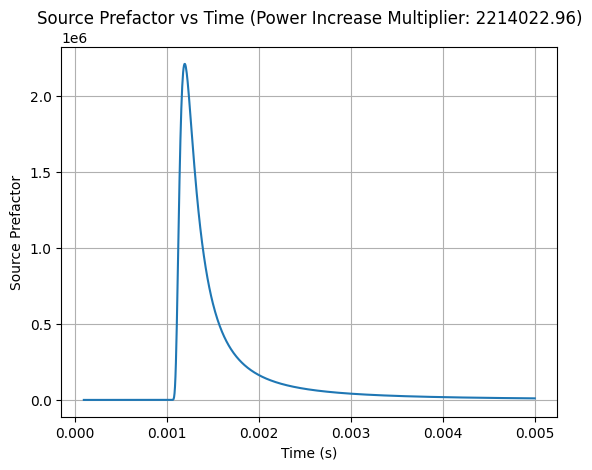

Required power increase multiplier: 2214022.963667627


In [17]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Dummy values for the right-hand side (these should be realistic in practice)
C = 1.0
p_e = 2.0  # electron pressure (Pa)
R_geo = 6.2  # geometric radius (m)
q_edge = 3.0  # safety factor at the edge

# Given formula for peak energy fluence (dummy values used)
epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

# ELM temporal profile parameters
omega_ci = 95788333.0
epsilon_min = 1e-9
sim_start_timestep = 1e-3
rise_start = 1e-3
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_ramp = 250e-6  # Rise time of the ELM (in seconds)
base_heat_flux = 1.0  # Baseline heat flux

# Time array for the temporal profile
t = np.linspace(1e-4, 5e-3, 1000)  # From 0.1 ms to 5 ms

# Function to calculate the temporal heat flux profile
def base_multiplier_func(t, t_rise, t_ramp, base_heat_flux):
    t_current = np.maximum(t - t_rise, epsilon_min)
    base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                      (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)
    return base_multiplier

# Calculate the base multiplier over time
base_multiplier = base_multiplier_func(t, t_rise, t_ramp, base_heat_flux)

# Integrate the profile to calculate the energy fluence (normalized to baseline)
total_fluence = integrate.simps(base_multiplier, t)

# Required power increase multiplier to match the peak energy fluence
power_increase_multiplier = epsilon_parallel_peak / total_fluence

# Calculate the source prefactor
normalised_multiplier = base_multiplier / np.max(base_multiplier)
source_prefactor = 1 + (power_increase_multiplier - 1) * normalised_multiplier

# Plotting the source_prefactor as a function of time
plt.plot(t, source_prefactor)
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.title(f"Source Prefactor vs Time (Power Increase Multiplier: {power_increase_multiplier:.2f})")
plt.grid(True)
plt.show()

# Print the required power increase multiplier
print(f"Required power increase multiplier: {power_increase_multiplier}")


In [18]:
import numpy as np
import scipy.integrate as integrate

# Dummy values for the right-hand side (these should be realistic in practice)
C = 1.0
p_e = 2.0  # electron pressure (Pa)
R_geo = 6.2  # geometric radius (m)
q_edge = 3.0  # safety factor at the edge

# Epsilon_parallel_peak formula
def calculate_epsilon_parallel_peak(C, p_e, R_geo, q_edge):
    return C * 6 * np.pi * p_e * R_geo * q_edge

# ELM temporal profile parameters
omega_ci = 95788333.0
epsilon_min = 1e-9
sim_start_timestep = 1e-3
rise_start = 1e-3
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_ramp = 250e-6  # Rise time of the ELM (in seconds)
base_heat_flux = 1.0  # Baseline heat flux

# Time array for the temporal profile
t = np.linspace(1e-4, 5e-3, 1000)  # From 0.1 ms to 5 ms

# Function to calculate the temporal heat flux profile
def base_multiplier_func(t, t_rise, t_ramp, base_heat_flux):
    t_current = np.maximum(t - t_rise, epsilon_min)
    base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                      (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)
    return base_multiplier

# Calculate the base multiplier over time
base_multiplier = base_multiplier_func(t, t_rise, t_ramp, base_heat_flux)

# Integrate the profile to calculate the energy fluence (normalized to baseline)
def calculate_total_fluence(base_multiplier, t):
    return integrate.simps(base_multiplier, t)

# Test function to compare both fluence values
def test_fluence():
    # Calculate peak energy fluence
    epsilon_parallel_peak = calculate_epsilon_parallel_peak(C, p_e, R_geo, q_edge)

    # Calculate the total ELM energy fluence from the temporal profile
    total_fluence = calculate_total_fluence(base_multiplier, t)

    # Compare the two fluence values
    if np.isclose(total_fluence, epsilon_parallel_peak, rtol=1e-3):
        print(f"Test passed: Total fluence {total_fluence:.6f} matches expected peak fluence {epsilon_parallel_peak:.6f}")
    else:
        print(f"Test failed: Total fluence {total_fluence:.6f} does not match expected peak fluence {epsilon_parallel_peak:.6f}")

# Run the test
test_fluence()


Test failed: Total fluence 0.000317 does not match expected peak fluence 701.203480


/tmp/ipykernel_3310237/2983662834.py:38: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return integrate.simps(base_multiplier, t)


/tmp/ipykernel_3310237/2619970620.py:40: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return integrate.simps(base_multiplier, t)


Test failed: Total fluence 0.214725 does not match expected peak fluence 701.203480


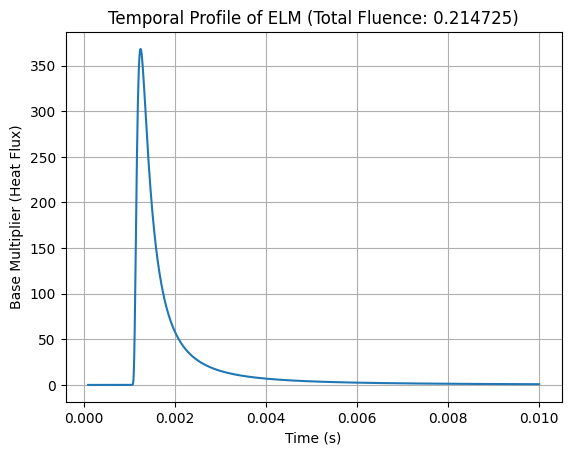

In [19]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Dummy values for the right-hand side (these should be realistic in practice)
C = 1.0
p_e = 2.0  # electron pressure (Pa)
R_geo = 6.2  # geometric radius (m)
q_edge = 3.0  # safety factor at the edge

# Given formula for peak energy fluence (dummy values used)
epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

# ELM temporal profile parameters
omega_ci = 95788333.0
epsilon_min = 1e-9
sim_start_timestep = 1e-3
rise_start = 1e-3
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_ramp = 250e-6  # Rise time of the ELM (in seconds)

# Adjusted base heat flux (scaled to match expected fluence)
base_heat_flux = 1000.0  # Increased baseline heat flux

# Time array for the temporal profile (extend the range)
t = np.linspace(1e-4, 1e-2, 1000)  # From 0.1 ms to 10 ms

# Function to calculate the temporal heat flux profile
def base_multiplier_func(t, t_rise, t_ramp, base_heat_flux):
    t_current = np.maximum(t - t_rise, epsilon_min)
    base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                      (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)
    return base_multiplier

# Calculate the base multiplier over time
base_multiplier = base_multiplier_func(t, t_rise, t_ramp, base_heat_flux)

# Integrate the profile to calculate the energy fluence (normalized to baseline)
def calculate_total_fluence(base_multiplier, t):
    return integrate.simps(base_multiplier, t)

# Test function to compare both fluence values
def test_fluence():
    # Calculate peak energy fluence
    epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

    # Calculate the total ELM energy fluence from the temporal profile
    total_fluence = calculate_total_fluence(base_multiplier, t)

    # Compare the two fluence values
    if np.isclose(total_fluence, epsilon_parallel_peak, rtol=1e-3):
        print(f"Test passed: Total fluence {total_fluence:.6f} matches expected peak fluence {epsilon_parallel_peak:.6f}")
    else:
        print(f"Test failed: Total fluence {total_fluence:.6f} does not match expected peak fluence {epsilon_parallel_peak:.6f}")
    
    # Plotting for visual inspection
    plt.plot(t, base_multiplier)
    plt.xlabel("Time (s)")
    plt.ylabel("Base Multiplier (Heat Flux)")
    plt.title(f"Temporal Profile of ELM (Total Fluence: {total_fluence:.6f})")
    plt.grid(True)
    plt.show()

# Run the test
test_fluence()


/tmp/ipykernel_3310237/2585258251.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  epsilon_parallel_profile = integrate.simps(temporal_profile, t)


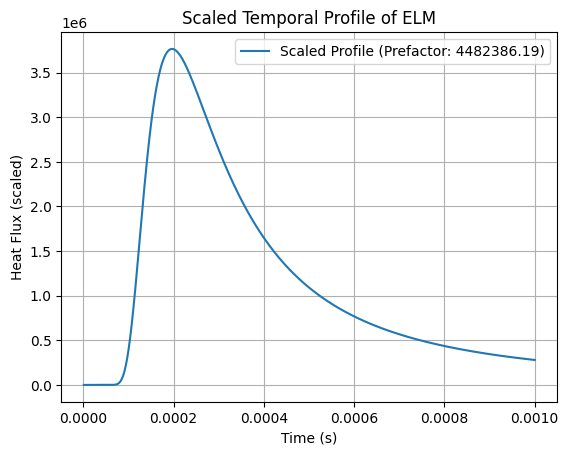

Prefactor: 4482386.186098


In [20]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Dummy values for the right-hand side (these should be realistic in practice)
p_n = 1.85  #  pedestal density (10^{20})
p_T = 2.5  # temperature (keV) (2 lower bound,  3.8 upper bound)

C = 1.0
p_e = 3/2 * (p_n*p_T)  # electron pressure (Pa)
R_geo = 1.85  # geometric radius (m)
q_edge = 5.0  # 3 for CD 5 for SXD
# Theoretical peak energy fluence
epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

# ELM temporal profile parameters
t_rise = 250e-6  # Rise time of the ELM (in seconds)
tau_decay = 1e-3  # Decay time of the ELM (in seconds)

# Time array for the temporal profile
t = np.linspace(1e-6, tau_decay, 1000)

# Function to calculate the normalized temporal heat flux profile
def elm_temporal_profile(t, t_rise):
    term = (t_rise / t)**2
    return (1 + term) * term * np.exp(-term)

# Calculate the temporal profile over time
temporal_profile = elm_temporal_profile(t, t_rise)

# Integrate the profile to calculate the energy fluence (normalized to peak)
epsilon_parallel_profile = integrate.simps(temporal_profile, t)

# Calculate the prefactor
prefactor = epsilon_parallel_peak / epsilon_parallel_profile

# Apply the prefactor to the temporal profile
scaled_temporal_profile = prefactor * temporal_profile

# Plotting the scaled temporal profile
plt.plot(t, scaled_temporal_profile, label=f'Scaled Profile (Prefactor: {prefactor:.2f})')
plt.xlabel("Time (s)")
plt.ylabel("Heat Flux (scaled)")
plt.title("Scaled Temporal Profile of ELM")
plt.grid(True)
plt.legend()
plt.show()

# Print the calculated prefactor
print(f"Prefactor: {prefactor:.6f}")


In [21]:
import numpy as np
import scipy.integrate as integrate

# Dummy values for the right-hand side (these should be realistic in practice)
p_n = 0.8  #  pedestal density (10^{20})
p_T = 4.7  # temperature (keV) (2 lower bound,  3.8 upper bound)

C = 1.0
p_e = 3/2 * (p_n*p_T)  # electron pressure (Pa)
# p_e = 325e3
R_geo = 1.85  # geometric radius (m)
q_edge = 3.0  # 3 for CD 5 for SXD

# Theoretical peak energy fluence
epsilon_parallel_peak = C * 6 * np.pi * p_e * R_geo * q_edge

print(f"Theoretical peak energy fluence: {epsilon_parallel_peak:.6f} J/m^2")

# ELM temporal profile parameters
t_rise = 250e-6  # Rise time of the ELM (in seconds)
tau_decay = 1e-3  # Decay time of the ELM (in seconds)

# Time array for the temporal profile
t = np.linspace(1e-6, tau_decay, 1000)

# Function to calculate the normalized temporal heat flux profile
def elm_temporal_profile(t, t_rise):
    term = (t_rise / t)**2
    return (1 + term) * term * np.exp(-term)

# Calculate the temporal profile over time
temporal_profile = elm_temporal_profile(t, t_rise)

# Integrate the profile to calculate the energy fluence (normalized to peak)
epsilon_parallel_profile = integrate.simps(temporal_profile, t)

# Calculate the prefactor
prefactor = epsilon_parallel_peak / epsilon_parallel_profile

# Apply the prefactor to the temporal profile
scaled_temporal_profile = prefactor * temporal_profile

# Integrate the scaled profile to get the total energy fluence
epsilon_parallel_scaled_profile = integrate.simps(scaled_temporal_profile, t)

# Test if the scaled profile fluence matches the theoretical peak fluence
def test_fluence():
    # Compare theoretical peak fluence with the integrated scaled profile fluence
    if np.isclose(epsilon_parallel_scaled_profile, epsilon_parallel_peak, rtol=1e-3):
        print(f"Test passed: Scaled profile fluence {epsilon_parallel_scaled_profile:.6f} matches theoretical peak fluence {epsilon_parallel_peak:.6f}")
    else:
        print(f"Test failed: Scaled profile fluence {epsilon_parallel_scaled_profile:.6f} does not match theoretical peak fluence {epsilon_parallel_peak:.6f}")

# Run the test
test_fluence()


Theoretical peak energy fluence: 590.028799 J/m^2
Test passed: Scaled profile fluence 590.028799 matches theoretical peak fluence 590.028799


/tmp/ipykernel_3310237/3314350753.py:35: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  epsilon_parallel_profile = integrate.simps(temporal_profile, t)
/tmp/ipykernel_3310237/3314350753.py:44: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  epsilon_parallel_scaled_profile = integrate.simps(scaled_temporal_profile, t)


In [22]:
# Ti = 2e3 * 1.602e-19  # Ion temperature (J)
Ti = 7.5e3 * 1.602e-19  # Ion temperature (J)
mi = 2 * 1.67e-27  # Ion mass (kg)

R_geo = 1.85  # geometric radius (m)
q_edge = 3.0  # 3 for CD 5 for SXD

cs_i = np.sqrt(Ti/mi)

print(f'Ion sound speed: {cs_i}')

tau_i_para = (2*np.pi * R_geo * q_edge) / cs_i

print(f"Tau parallel: {tau_i_para} s")

tau_rise = 0.29 * (tau_i_para)**(1.38)

print(f"Tau rise: {tau_rise} s")

tau = 0.8 * tau_rise

print(f"Tau: {tau} s")

Ion sound speed: 599775.4070668083
Tau parallel: 5.814122760615689e-05 s
Tau rise: 4.1436798187848223e-07 s
Tau: 3.314943855027858e-07 s


/tmp/ipykernel_3310237/16692033.py:25: RuntimeWarning: invalid value encountered in divide
  normalised_multiplier = base_multiplier / max_base_multiplier


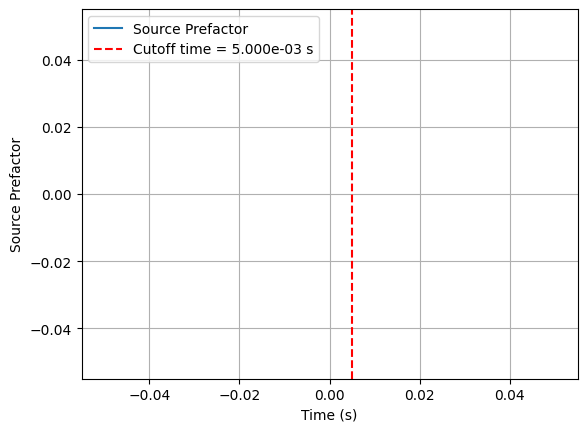

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Time points for the plot
t = np.linspace(1e-3, 5e-3, 1000)  # Time points

omega_ci = 95788333.0    # normalise to simulation timestep
epsilon_min = 1e-9       # small number to avoid divide by zero in t_current
sim_start_timestep = 1e-3
rise_start = 1e-3        # offset from the sim start time step
t_rise = (sim_start_timestep / omega_ci) + rise_start
t_current = np.maximum(t - t_rise, epsilon_min)  # time since ELM pulse started

# t_ramp = 250e-6  # Rise time of the ELM
t_ramp = 120e-6
base_heat_flux = 1.0  # Baseline heat flux
power_increase = 4.0  # Power increase factor

# Typical divertor ELM time loading
base_multiplier = (base_heat_flux + (t_ramp / t_current)**2) * \
                  (t_ramp / t_current)**2 * np.exp(-(t_ramp / t_current)**2)

# Normalising the multiplier
max_base_multiplier = np.max(base_multiplier)
normalised_multiplier = base_multiplier / max_base_multiplier

# Calculate the source prefactor
source_prefactor = 1 + (power_increase - 1) * normalised_multiplier
threshold_value = 0.01 * np.max(source_prefactor)  # 1% of the peak

# Check if the source prefactor drops below the threshold
if np.min(source_prefactor) <= threshold_value:
    # Find the time where the function drops to 1% of the peak
    cutoff_index = np.where(source_prefactor <= threshold_value)[0][0]
    t_cutoff = t[cutoff_index]
else:
    # If the threshold isn't reached, use the last time value as cutoff
    t_cutoff = t[-1]

# Set the source prefactor to 1 after the cutoff point
source_prefactor = np.where(t <= t_cutoff, source_prefactor, 1)

# Plotting the source_prefactor as a function of time
plt.plot(t, source_prefactor, label="Source Prefactor")
plt.axvline(x=t_cutoff, color='r', linestyle='--', label=f'Cutoff time = {t_cutoff:.3e} s')
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.grid(True)
plt.legend()
plt.show()


In [24]:
import numpy as np

R_geo = 1.85
q_edge = 3.0
Te = 2e3 # Electron temperature in Joules (2 keV)
kbt = 1.3806e-23
e = 1.602e-19
conv = e/kbt
Te = Te * conv

mi = 2 * 1.67e-27     # Ion mass for deuterium in kg

cs = np.sqrt((Te * kbt) / mi)  # Ion sound speed based on electron temperature

print(fr"Ion sound speed: {cs/1e5} x$10^5$m/s")

# Use cs in further calculations as needed
tau_i_para = (2 * np.pi * R_geo * q_edge) / cs

print(f"Tau parallel: {tau_i_para/1e-6} us")

tau_rise = 0.29 * ((tau_i_para)**1.38)

print(f"Tau rise: {tau_rise} s")

tau = 0.8 * tau_rise

print(f"Tau: {tau/1e-6} s")


Ion sound speed: 3.0972268840460306 x$10^5$m/s
Tau parallel: 112.59000312335029 us
Tau rise: 1.0314965148046475e-06 s
Tau: 0.825197211843718 s


In [25]:
# Dummy values for the right-hand side (these should be realistic in practice)
# p_n = 0.8  #  pedestal density (10^{20})
# p_T = 4.7  # temperature (keV) (2 lower bound,  3.8 upper bound)

# C = 1.0
# p_e = 3/2 * (p_n*p_T)  # electron pressure (Pa)
# # p_e = 325e3
# R_geo = 1.85  # geometric radius (m)
# q_edge = 3.0  # 3 for CD 5 for SXD
# e = 1.602e-19
# kbt = 1.3806e-23
# p = 3/2 * (p_n*(p_T/(kbt/e)))


# # Eich model
def eich_scaling(p_ped, R_geo, q_edge):
    C = 1
    return C * 6 * np.pi * p_ped * R_geo * q_edge

# Very simple Eich model
def eich_simple_scaling(pe, l_para):
    return 3 * pe * l_para

# Eich Scaling
def exp_scaling(ne, Te, ELM_percent, R_geo):
    return 0.28 * 1e3 *  ((ne/1e20)**0.75) * ((Te/1e3)**0.98) * (ELM_percent**0.52) * (R_geo)




In [26]:
# ITER Q = 10
ne = 8e19
Te = 4.7e3
R_geo = 6.2
q_edge = 3.0

kbt = 1.3806e-23
e = 1.602e-19
conv = e/kbt
Te = Te*conv

p = 3/2*( ne * Te * kbt)

epsilon_parallel_peak = eich_scaling(p, R_geo, q_edge)
exp_peak = exp_scaling(ne, Te, 2, R_geo)

print(f"ITER Theoretical peak energy fluence: {epsilon_parallel_peak/1e6:.6f} MJ/m^2")
print(f"ITER Experimental peak energy fluence: {exp_peak/1e6:.6f} MJ/m^2")





ITER Theoretical peak energy fluence: 31.677849 MJ/m^2
ITER Experimental peak energy fluence: 92.333959 MJ/m^2


In [27]:
# Glimmer
# PRD
ne = 2.8e20
Te = 3.8e3

# ADC
ne = 1.85e20
Te = 2.0e3


R_geo = 1.85
q_edge = 3.0

glimmer_connection = 51
kbt = 1.3806e-23
e = 1.602e-19
conv = e/kbt
print(conv)

print(f'Te: {Te*conv} kelvin')
Te = Te*conv

p = 3/2*( ne * Te * kbt)

print(f'pedestal pressure: {p/1e3} kPa')

epsilon_parallel_peak = eich_scaling(p, R_geo, q_edge)
simple_parallel_peak = eich_simple_scaling(p, glimmer_connection)
exp_peak = exp_scaling(ne, Te, 2, R_geo)

print(f"Glimmer Theoretical peak energy fluence: {epsilon_parallel_peak/1e6:.6f} MJ/m^2")
print(f"Glimmer Simple peak energy fluence: {simple_parallel_peak/1e6:.6f} MJ/m^2")
print(f"Glimmer Experimental peak energy fluence: {exp_peak/1e6:.6f} MJ/m^2")

11603.650586701435
Te: 23207301.17340287 kelvin
pedestal pressure: 88.911 kPa
Glimmer Theoretical peak energy fluence: 9.301427 MJ/m^2
Glimmer Simple peak energy fluence: 13.603383 MJ/m^2
Glimmer Experimental peak energy fluence: 22.364351 MJ/m^2


# New functions

In [12]:
def symmetric_gaussian_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    # Centre of the pulse
    pulse_center = ELM_start + pulse_duration / 2
    sigma = tau_rise / np.sqrt(2 * np.log(2))  # Relate tau_rise to Gaussian width
    return 1 + (pulse_amplitude / base_heat_flux) * np.exp(-((t - pulse_center) / sigma) ** 2)


In [13]:
def symmetric_sigmoid_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    # Centre of the pulse
    pulse_center = ELM_start + pulse_duration / 2
    return 1 + (pulse_amplitude / base_heat_flux) * (
        1 / (1 + np.exp(-(t - pulse_center) / tau_rise))
        * (1 / (1 + np.exp((t - pulse_center) / tau_rise)))
    )


In [14]:
def symmetric_polynomial_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    # Centre of the pulse
    pulse_center = ELM_start + pulse_duration / 2
    half_duration = pulse_duration / 2

    # Define cubic smooth-step function
    def smooth_step(x):
        return 3 * x**2 - 2 * x**3  # x in [0, 1]

    # Symmetric polynomial pulse
    x = np.abs(t - pulse_center) / half_duration
    x = np.clip(x, 0, 1)  # Ensure x is between [0, 1]
    return 1 + (pulse_amplitude / base_heat_flux) * (1 - smooth_step(x))


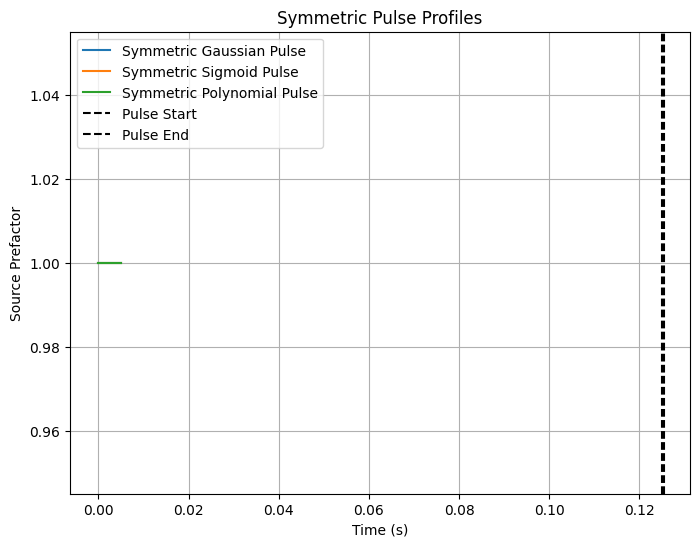

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters


t = np.linspace(0, 5e-3, 1000)  # 1000 points between 0 and 5 ms
tau_rise = 250e-6
pulse_duration = 2 * tau_rise
base_heat_flux = 0.4e9
pulse_amplitude = 4 * base_heat_flux
ELM_start = 0.125

# Generate profiles
gaussian_profile = symmetric_gaussian_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)
sigmoid_profile = symmetric_sigmoid_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)
polynomial_profile = symmetric_polynomial_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, gaussian_profile, label="Symmetric Gaussian Pulse")
plt.plot(t, sigmoid_profile, label="Symmetric Sigmoid Pulse")
plt.plot(t, polynomial_profile, label="Symmetric Polynomial Pulse")
plt.axvline(ELM_start, color="k", linestyle="--", label="Pulse Start")
plt.axvline(ELM_start + pulse_duration, color="k", linestyle="--", label="Pulse End")
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.title("Symmetric Pulse Profiles")
plt.legend()
plt.grid()
plt.show()


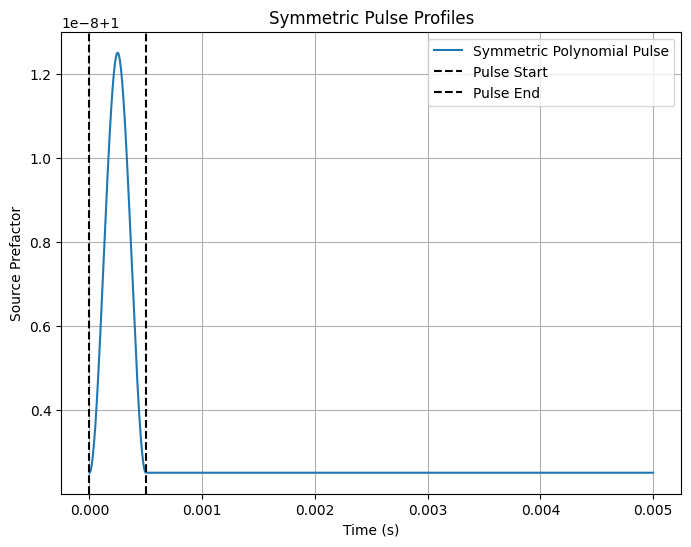

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Symmetric pulse functions
def symmetric_gaussian_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    pulse_center = ELM_start + pulse_duration / 2
    sigma = tau_rise / np.sqrt(2 * np.log(2))
    return 1 + (pulse_amplitude / base_heat_flux) * np.exp(-((t - pulse_center) / sigma) ** 2)

def symmetric_sigmoid_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    pulse_center = ELM_start + pulse_duration / 2
    return 1 + (pulse_amplitude / base_heat_flux) * (
        1 / (1 + np.exp(-(t - pulse_center) / tau_rise))
        * (1 / (1 + np.exp((t - pulse_center) / tau_rise)))
    )

def symmetric_polynomial_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude):
    pulse_center = ELM_start + pulse_duration / 2
    half_duration = pulse_duration / 2

    def smooth_step(x):
        return 3 * x**2 - 2 * x**3

    x = np.abs(t - pulse_center) / half_duration
    x = np.clip(x, 0, 1)
    return 1 + (pulse_amplitude / base_heat_flux) * (1 - smooth_step(x))

# Parameters
t = np.linspace(0, 5e-3, 1000)  # 1000 points between 0 and 5 ms
tau_rise = 250e-6
pulse_duration = 0.5e-3  # 1 ms pulse duration
base_heat_flux = 0.4e9
pulse_amplitude = 4 * base_heat_flux
ELM_start = 1e-9  # Start at 2 ms

# Generate profiles
gaussian_profile = symmetric_gaussian_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)
sigmoid_profile = symmetric_sigmoid_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)
polynomial_profile = symmetric_polynomial_pulse(t, ELM_start, tau_rise, pulse_duration, base_heat_flux, pulse_amplitude)

polynomial_prefactor = 1 + (polynomial_profile / base_heat_flux)

# Plot
plt.figure(figsize=(8, 6))
# plt.plot(t, gaussian_profile, label="Symmetric Gaussian Pulse")
# plt.plot(t, sigmoid_profile, label="Symmetric Sigmoid Pulse")
plt.plot(t, polynomial_prefactor, label="Symmetric Polynomial Pulse")
plt.axvline(ELM_start, color="k", linestyle="--", label="Pulse Start")
plt.axvline(ELM_start + pulse_duration, color="k", linestyle="--", label="Pulse End")
plt.xlabel("Time (s)")
plt.ylabel("Source Prefactor")
plt.title("Symmetric Pulse Profiles")
plt.legend()
plt.grid()
plt.show()


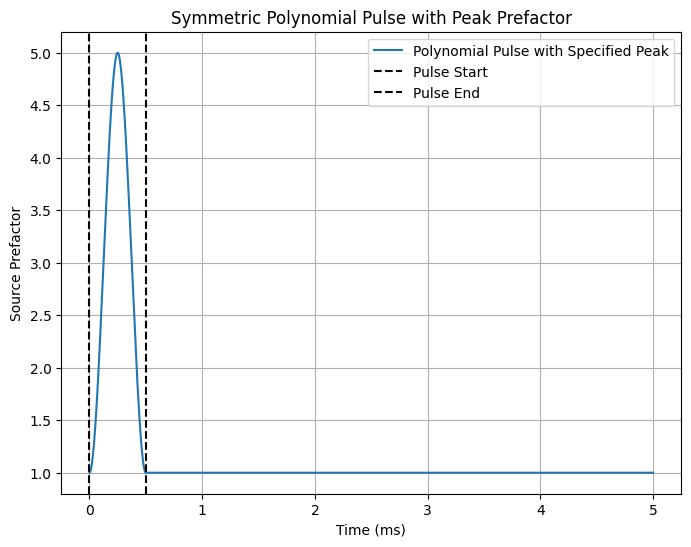

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial pulse function with a specified peak prefactor
def polynomial_pulse_with_peak(t, ELM_start, tau_rise, pulse_duration, prefactor_peak):
    """
    Symmetric polynomial pulse with a specified peak prefactor.
    
    Parameters:
    - t: Time array
    - ELM_start: Start time of the pulse (s)
    - tau_rise: Rise time (s)
    - pulse_duration: Total pulse duration (s)
    - prefactor_peak: Desired peak value of the prefactor
    
    Returns:
    - Pulse profile as an array
    """
    # Centre of the pulse
    pulse_center = ELM_start + pulse_duration / 2
    half_duration = pulse_duration / 2

    # Normalized time variable
    x = np.abs(t - pulse_center) / half_duration
    x = np.clip(x, 0, 1)  # Clamp x between [0, 1]

    # Cubic smooth-step function
    smooth_step = 3 * x**2 - 2 * x**3

    # Scale smooth_step to achieve the desired peak prefactor
    return 1 + (prefactor_peak - 1) * (1 - smooth_step)

# Parameters
t = np.linspace(0, 5e-3, 1000)  # Time array from 0 to 5 ms
ELM_start = 0  # Start time of the pulse (s)
tau_rise = 250e-6  # Rise time (s)
pulse_duration = 0.5e-3  # Total pulse duration (s)
prefactor_peak = 5.0  # Desired peak value of the prefactor

# Generate the pulse profile
pulse_profile = polynomial_pulse_with_peak(t, ELM_start, tau_rise, pulse_duration, prefactor_peak)

# Plot the pulse
plt.figure(figsize=(8, 6))
plt.plot(t * 1e3, pulse_profile, label="Polynomial Pulse with Specified Peak")
plt.axvline(ELM_start * 1e3, color="k", linestyle="--", label="Pulse Start")
plt.axvline((ELM_start + pulse_duration) * 1e3, color="k", linestyle="--", label="Pulse End")
plt.xlabel("Time (ms)")
plt.ylabel("Source Prefactor")
plt.title("Symmetric Polynomial Pulse with Peak Prefactor")
plt.legend()
plt.grid()
plt.show()
